## Entropy
We inspire from   
_LS Schulman and PE Seiden. Statistical mechanics of a dynamical system
based on conway’s game of life. Journal of Statistical Physics, 19(3):293–314, 1978._   
and implent their proposed variant of entropy for the Game of Life.  
  
A system that begins randomly populated will, under the propagation
rules of the Conway game, develop structure and correlations. **One way to
measure the increasing order** in the system is by using a quantity analogous to entropy in statistical mechanics. The general idea is to subdevide the system and **measure the extent to which living cells do or do not cluster.**  
  
**A J x J board is broken into subregions of size j x j.** A coarse-grained
description of the state of the system is provided by the sequence $n_i i \in [1,(J/j)^2]$, where $n_i$ is the number of live cells in the i-th subregion. The entropy associated with this coarse-grained description is given by the logarithm of the total number of microscopic states that can be associated with the given sequence. Thus 
$$ S=\frac{1}{J^2} log\prod_{i=1}^{(J/j)^2} {j^2 \choose n_i}$$


The subregions size j is a hyperparameter which we will expore.  
For most of our studies we would use $j=3$  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
# import matplotlib.animation
# from matplotlib import rc
# rc('animation', html='jshtml')

# import import_ipynb
# from google.colab import drive
# drive.mount('mnt')

In [4]:
# %cd "/content/mnt/MyDrive/Game_of_Life"
# !pip install import_ipynb
import import_ipynb
from environment import GameOfLifeEnv

importing Jupyter notebook from environment.ipynb
importing Jupyter notebook from utils.ipynb


## Etropy defenition

In [5]:
def get_entropy(grid, subregion_size=3):
    #grid is a 2d np.array 
    grid_size = grid.shape[0]
    number_of_subregions = int(np.ceil(grid_size / subregion_size)**2)
    live_in_subregion = np.zeros(number_of_subregions)
    subregion_index = 0
    
# for each subregion get the number of live cells
    for row in range(0, grid_size, 1):
        for col in range(0, grid_size, 1):
            # count all live cells in this subregion
            for i in range(row, row + subregion_size, 1):
                for j in range(col, col + subregion_size, 1):
                    live_in_subregion[subregion_index] += grid[(i + grid_size) % grid_size][(j + grid_size) % grid_size]
               
            subregion_index +=1
        
    return np.sum(np.log(binom(subregion_size**2, live_in_subregion))) / grid_size**2

Testing the entropy calculation for several grid sizes


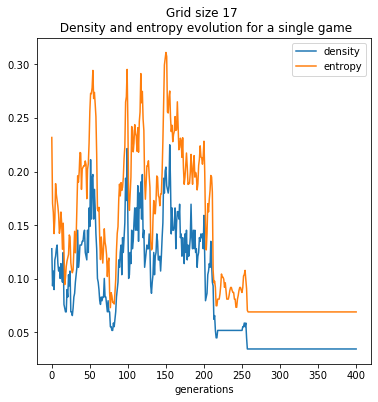

In [6]:
%matplotlib inline
env = GameOfLifeEnv(grid_size=17, density=0.6, seed=458)
env.reset()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
densities = np.zeros(401)
entropies = np.zeros(401)

done = False
for j in range(401):
    if not done:
        state, r, done = env.step(None)
    densities[j] = r
    entropies[j] = get_entropy(state)

ax.plot(range(401), densities, label='density')
ax.plot(range(401), entropies, label='entropy')
ax.set_title(f'Grid size {env.grid_size} \n Density and entropy evolution for a single game')
ax.set_xlabel('generations')
plt.legend()
plt.show()

The entropy is strongly related to the density so we will normalize it by deviding by that of a random board with the same density. 
   
This way the less the entropy of our system is due to the random distribution (and more due to its emerging ordered structure) the further the normalized entropy should be from $1$ .
  
## We start by calculating the **entropies of random boards** of given densities:

---



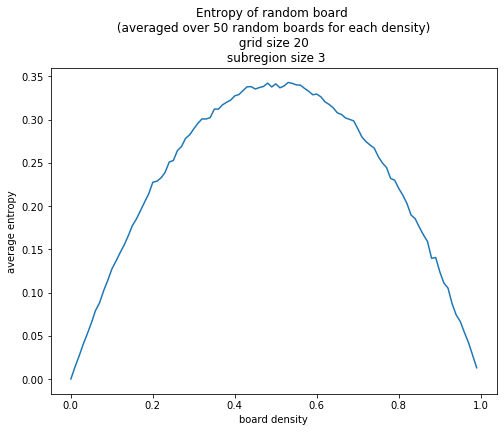

In [7]:
%matplotlib inline
densities = np.arange(0, 1, 0.01)
average_entropies = np.zeros_like(densities)
N_average_over = 50
grid_size = 20
for i, d in enumerate(densities):
    s = 0 
    for j in range(N_average_over):
        env = GameOfLifeEnv(grid_size=grid_size, density=d)
        state = env.reset()
        s += get_entropy(state, subregion_size=2)
    average_entropies[i] = s / N_average_over
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(densities, average_entropies)
# print(average_entropies)
ax.set_title(f'Entropy of random board \n (averaged over {N_average_over} random boards for each density) \n grid size {grid_size} \n subregion size {3}')
ax.set_xlabel('board density')
ax.set_ylabel('average entropy')
plt.show()

The shape is the same as the classical entropy for $S= log \Omega $ where $ \Omega$ is the number of microstates for a given macrostate (fixed density).
  
## We proceed to use this result for defining normalized entropy.

In [8]:
%matplotlib inline
def get_random_system_entropy(density):
  densities = np.arange(0, 1, 0.01)
  average_entropies = [0., 0.01525252, 0.02609767, 0.03613131, 0.0518619, 0.06535278, 0.07959899, 0.08570525, 0.10319554, 0.10968507, 0.12444196, 0.13584762, 0.14872067, 0.15572281, 0.16476713, 0.17493169, 0.18499817, 0.19559425, 0.20048626, 0.21102944, 0.22058581, 0.22994929, 0.23546127, 0.24372806, 0.24753459, 0.25510438, 0.2660314, 0.27270089, 0.27144202, 0.28346187, 0.2929966, 0.29662588, 0.30038607, 0.30188608, 0.30941611, 0.31146543, 0.31384183, 0.31990968, 0.32367102, 0.32255813, 0.32462908, 0.32771754, 0.33094136, 0.33593608, 0.3352076, 0.33467007, 0.3423281, 0.34062207, 0.33795877, 0.34097, 0.34067632, 0.33876563, 0.33807056, 0.3417815, 0.33965823, 0.33768922, 0.33475116, 0.33616758, 0.33053396, 0.32713019, 0.32684579, 0.32349513, 0.31950286, 0.32029873, 0.31344893, 0.31838919, 0.30579012, 0.3024099, 0.29486753, 0.29297575, 0.28640243, 0.28248875, 0.27493131, 0.27372419, 0.26574372, 0.25655671, 0.24575461, 0.23703445, 0.23773359, 0.23168023, 0.22576492, 0.2139171, 0.20333009, 0.19234418, 0.18232288, 0.17713799 , 0.16630712, 0.15811678, 0.14646726, 0.13677092, 0.13076081, 0.11277932, 0.10439938, 0.09069727, 0.0777831, 0.06510044, 0.0523559, 0.04022416, 0.02886697, 0.01253747]
  return np.interp(density, densities, average_entropies)

def get_normalized_entropy(grid, subregion_size=3):
    density = np.sum(grid) / (grid.shape[0] * grid.shape[1])
    if density == 0:
        return 1
    entropy = get_entropy(grid, subregion_size)
    norm_entropy = entropy  / get_random_system_entropy(density)
    # print(f'density: {density},\n entropy {entropy}, а на случаен грин със същата плътност е {get_random_system_entropy(density)}')
    return norm_entropy


## We explore the hyperparameter and the effect of the grid size

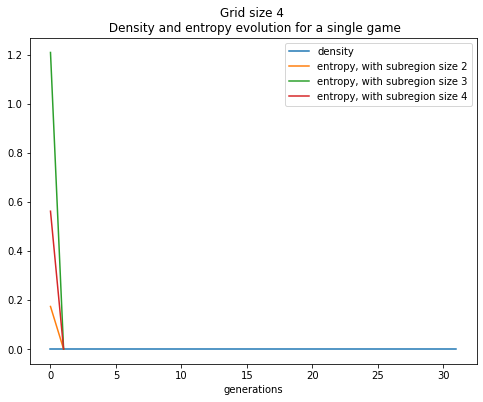

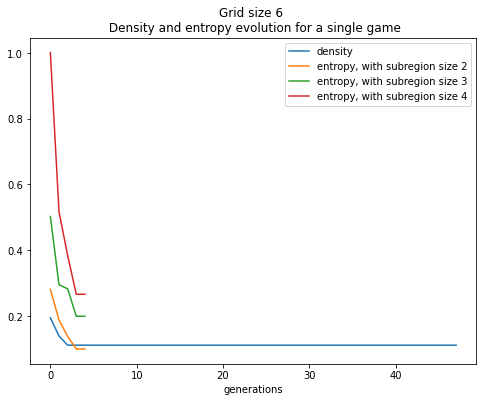

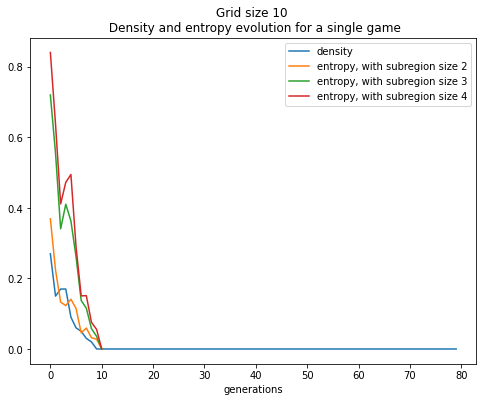

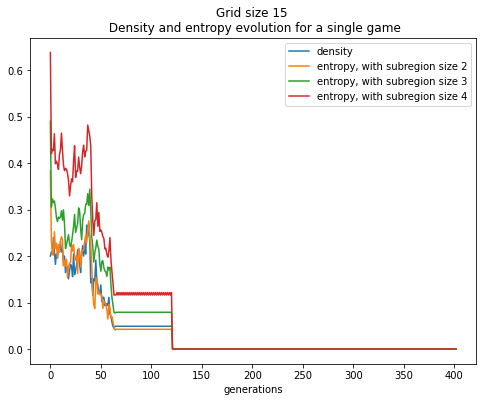

In [26]:
%matplotlib inline
average_over = 5

for grid_size in [4, 6, 10, 15]:
  max_steps = 8 * grid_size
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))
  env = GameOfLifeEnv(grid_size=grid_size, density=0.6, save_states=True)
  avg_densities = np.zeros(max_steps)

  for k, _ in enumerate(range(average_over)):
    env.reset()

    densities = np.zeros(max_steps)

    # run game evolution
    done = False
    for j in range(max_steps):
      if not done:
          state, r, done = env.step(None)
      densities[j] = r

    # calculate and plot entropies 
    for i, subregion_size in enumerate([2, 3, 4]):
      entropies = []
      for s in env.states: 
        entropies.append(get_entropy(s, subregion_size))
      label = f'entropy, with subregion size {subregion_size}'
      # ax.plot(entropies, label=label)

  avg_densities = (k * avg_densities + densities) / (k+1)
  # plot densities
  ax.plot(range(max_steps), densities, label='density')
  # ax[i].plot(range(max_steps), entropies, label='entropy')
  ax.set_title(f'Grid size {env.grid_size} \n Density and entropy evolution for a single game')
  ax.set_xlabel('generations')


  plt.legend()
plt.show()
